## Homework

Due 10/16 11:59pm

Name your submission yourRCSID_HW2.ipynb

In [391]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import numpy.linalg as la
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [392]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,auc


In [393]:

def plot_decision_boundary(model,X_data,y_data):
    fig,ax = plt.subplots()
    # Make grid: min to max of 1st column, min to max of 2nd column in small increments
    X1,X2 = np.meshgrid(np.arange(X_data[:, 0].min() - 1, X_data[:, 0].max() + 1, step = 0.01),
                     np.arange(X_data[:, 1].min() - 1, X_data[:, 1].max() + 1, step = 0.01))
    # Flatten X1 and X2, create an array and transpose to a 2-column array (one for each feature)
    v = np.array([X1.ravel(), X2.ravel()]).T
    #  Using fitted model, predict the points in v and reshape to a 2-dimensional array
    ax.contourf(X1, X2, model.predict(v).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('magenta','cyan')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_data)): # For each class
        ax.scatter(X_data[y_data == j, 0], X_data[y_data == j, 1],
                c = np.array(ListedColormap(('white', 'black'))(i)).reshape(1,-1), 
                                            label = j)
    ax.set_title('Decision Boundary');

### The homework has three parts.

#### Part 1: (80 pts).
Data Analysis of a dataset with  three different  Classification algorithms.  

Exploratory Data Analysis and Data Preprocessing (20 pts)  
Generic Preprocessing, Classification Model and Results (20 pts)  
KNN Model (15 pts)  
Logistic Regression Model (10 pts)  
Support Vector Machine Model (15 pts)  

#### Part 2: (10 pts)
A PyTorch model of the dataset.
#### Part 3: (10 pts)
Two Linear Algebra questions

### Data

#### Goal

Clasify the features into no/yes classes.

In [394]:
df = pd.read_csv("HW2.csv")
df.tail()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,Class
763,10,101.0,76,48,180,32.9,0.171,63,no
764,2,122.0,70,27,0,36.8,0.340,27,no
765,5,NaN,72,23,112,26.2,0.245,30,no
766,1,126.0,60,0,0,30.1,0.349,47,yes
767,1,93.0,70,31,0,30.4,0.315,23,no


### Part 1  Exploratory Data Analysis & Data Preprocessing

Provide descriptive statistics and visualizations of the dataset. (10pts)  



In [395]:
df.describe()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8
count,768.000000,762.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.893701,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,32.098411,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


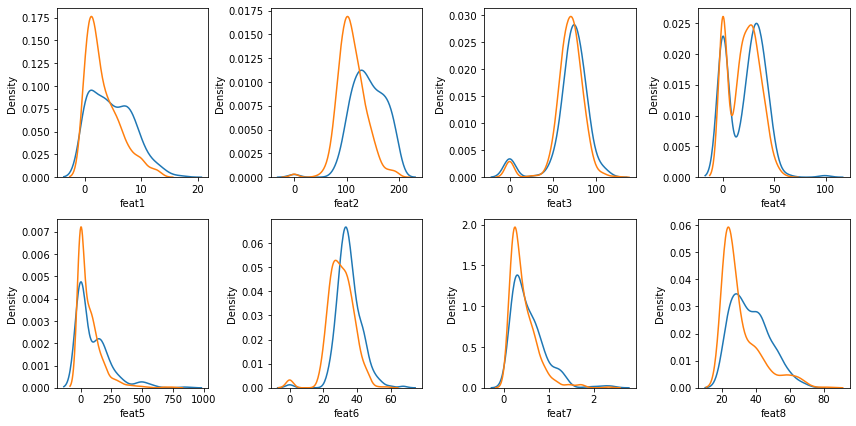

In [396]:
###Hint:
### Use this code to display eight plots in an 2x4 array
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8))=plt.subplots(2,4,figsize = (12,6))
df_yes = df.loc[df['Class']=='yes']
df_no = df.loc[df['Class']=='no']
for i,ax in enumerate((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)):    
    sns.distplot(df_yes.iloc[:,i], hist = False, ax = ax)
    sns.distplot(df_no.iloc[:,i], hist = False, ax = ax)
plt.tight_layout()

#### Data Preprocessing

Use sklearn SimpleImputer to process missing values (5pts)

In [397]:
imp= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.iloc[:,0:8] = imp.fit_transform(df.iloc[:,0:8])
df.tail()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,Class
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,no
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,no
765,5.0,99.0,72.0,23.0,112.0,26.2,0.245,30.0,no
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,yes
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,no


#### Check for zeros in the features

Use sklearn SimpleImputer to replace the zeros in features feat4 and feat5 with the means of the feature (5pts)

In [398]:
for col in df.columns:
    print(f'{col}  {np.sum(df[col] == 0)}')

feat1  111
feat2  5
feat3  35
feat4  227
feat5  374
feat6  11
feat7  0
feat8  0
Class  0


In [399]:
imp = SimpleImputer(missing_values=0, strategy='mean')
df[['feat4', 'feat5']] = imp.fit_transform(df[['feat4', 'feat5']])

### Generic Preprocessing, Model & Results

Complete the code in run_model (14 pts)

In [400]:
def run_model(model,X,y):
    '''
    Inputs:
    model: a sklearn machine learning object
    X: numpy array of features
    y: numpy vector of target variable
    
    Returns:
    model: fitted model
    X_test: test data for feature
    y_test: test data for target'''
    
    # Train/Test Split
    # Your Code Here 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
                                                       
    # Scaling
    # Your Code Here
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test  = scaler.transform(X_test)

    print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

    # Model
    print(model)
    # Fit the training data
    # Your Code Here
    model.fit(X_train, y_train)
    
    # Predict the test data
    # Your Code Here
    predictions = model.predict(X_test)

    # Calculate the accuracy, error,precision,recall and f1
    # Your Code Here
    cm = confusion_matrix(y_test,predictions)
    
    tn, fp, fn, tp = cm[0,0],cm[0,1],cm[1,0], cm[1,1]
    accuracy = np.trace(cm)/np.sum(cm)
    error = (fp+fn) / np.sum(cm)
    recall = tp / (tp+fn)
    precision = tp / (tp+fp)
    f1 = (2 * recall * precision) / (recall + precision)
    
    print("Confusion Matrix:")
    print(cm)
    print(f'Accuracy: {accuracy}\nError: {error}')
    print(f'Precision: {precision}\nRecall: {recall}\nF1: {f1}')
   
    return model,X_test,y_test

#### Display ROC, Auc and Decision Boundary

Complete the code in Classification Plots (6 pts)

In [401]:
def classification_plots (model,X_data,y_data):
    # Calculate class probabilities for each data point
    # Your Code Here
    ypp = model.predict_proba(X_data)
    
    # Calculate false positive (fpr) rate and true positive rate (tpr)
    # Your Code Here
    fpr, tpr, thresholds = roc_curve(y_data, ypp[:, 1])
    
    # Calculate AUC (roc_auc)
    # Your Code Here
    roc_auc = auc(fpr, tpr)

    #### Plot ROC curves 

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate');

#### Decision Boundary plot

    plot_decision_boundary(model,X_data,y_data)

 
### K-nearest Neighbor  Model

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

* Classification algorithm
    - Classify a point according to the the class of its K closest neighbors
* Regression algorithm
    - Assign y value to the mean of the K closest neighbors
* Closest determined by some distance measure
* Simple algorithm but often gives very good results
* Lazy learner: just uses the training data, it doesn't have any learned parameters  
* K is a hyperparameter
    - How to choose the best K?
* A **hyperparameter** is a parameter that controls the learning process.  
    - It is not learned but must be tuned by the modeler.



### KNN Algorithm

1. Choose K (the number of neighbors to use)
2. Find the K nearest neighbors to the new point $x_{new}$ using a distance measure (most common is Euclidean Distance)  

<div style="font-size: 110%;">
    $$\text{Euclidean distance between two points }(x_1,y_1),(x_2,y_2) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$
</div>
 
3. Among these K neighbors count the number in each category (i.e. class)
4. Assign the new point the category  with the highest count


* The algorithm estimates the conditional probability for class j as the fraction of points in $N_{new}$ with response value j and classifies $X_{new}$ to the class with highest probability.

$$Pr(Y=j|X=x_{new}) = \frac{1}{K}\sum_{i\in{N_{new}}}I(y_i=j)$$

### Distance Measures

 http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html




### KNN Model

Function to run KNN model with 1 hyperparameter (the number of nearest neighbors. ) 

Inputs: Features, target, list of hyperparameters

Returns the average score over the number of iterations, the model, the X test data and the y test data.

#### run_knn (10 pts)

Complete the code in run_knn.

In [402]:
def run_knn(X,y,hyperparams,iter=5):
    avg_scores = np.zeros(len(hyperparams))
    # Loop to instantiate and run model iter times with different hyperparameters
    # Your Code Here
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234)

    for i in range(len(hyperparams)):
        model = KNeighborsClassifier(n_neighbors = hyperparams[i])
        for j in range(iter):
            model, X_test, y_test = run_model(model, X, y)
            avg_scores[i] += model.score(X_test, y_test)
        
        avg_scores[i] /= iter
            
    
    return avg_scores,model,X_test,y_test
        

#### Run KNN model with all the features (2pts)

Features: All  
Hyperparameters: (1,5,10)  
Number of iterations for each hyperparameter: 5

In [403]:
# Make feature and target arrays
# Your Code Here

X = df.iloc[:,:8].values
y = df[['Class']].T.squeeze().map({'yes': 1, 'no': -1}).values
hyperparams = [1, 5, 10]
iter = 5

# Call run_knn
# Your Code Here
avg_scores,model,X_test,y_test = run_knn(X, y, hyperparams, iter)


(614, 8) (154, 8) (614,) (154,)
KNeighborsClassifier(n_neighbors=1)
Confusion Matrix:
[[74 25]
 [32 23]]
Accuracy: 0.6298701298701299
Error: 0.37012987012987014
Precision: 0.4791666666666667
Recall: 0.41818181818181815
F1: 0.44660194174757284
(614, 8) (154, 8) (614,) (154,)
KNeighborsClassifier(n_neighbors=1)
Confusion Matrix:
[[74 25]
 [32 23]]
Accuracy: 0.6298701298701299
Error: 0.37012987012987014
Precision: 0.4791666666666667
Recall: 0.41818181818181815
F1: 0.44660194174757284
(614, 8) (154, 8) (614,) (154,)
KNeighborsClassifier(n_neighbors=1)
Confusion Matrix:
[[74 25]
 [32 23]]
Accuracy: 0.6298701298701299
Error: 0.37012987012987014
Precision: 0.4791666666666667
Recall: 0.41818181818181815
F1: 0.44660194174757284
(614, 8) (154, 8) (614,) (154,)
KNeighborsClassifier(n_neighbors=1)
Confusion Matrix:
[[74 25]
 [32 23]]
Accuracy: 0.6298701298701299
Error: 0.37012987012987014
Precision: 0.4791666666666667
Recall: 0.41818181818181815
F1: 0.44660194174757284
(614, 8) (154, 8) (614,) (15

In [404]:
print(f'Average scores per hyperparameter: {avg_scores}')

Average scores per hyperparameter: [0.62987013 0.72077922 0.72727273]


#### Run KNN model with two features (3 pts)

Features: Two features you think will give the best prediction  
Hyperparameters: (5,10)  
Number of iterations: 5

In [405]:
# Make feature and target arrays
# Your Code Here
X = df.iloc[:,[6, 7]].values
y = df[['Class']].T.squeeze().map({'yes': 1, 'no': -1}).values
hyperparams = [1, 5, 10]
iter = 5

# Call run_knn
# Your Code Here
avg_scores,model,X_test,y_test = run_knn(X, y, hyperparams, iter)

(614, 2) (154, 2) (614,) (154,)
KNeighborsClassifier(n_neighbors=1)
Confusion Matrix:
[[71 28]
 [36 19]]
Accuracy: 0.5844155844155844
Error: 0.4155844155844156
Precision: 0.40425531914893614
Recall: 0.34545454545454546
F1: 0.37254901960784315
(614, 2) (154, 2) (614,) (154,)
KNeighborsClassifier(n_neighbors=1)
Confusion Matrix:
[[71 28]
 [36 19]]
Accuracy: 0.5844155844155844
Error: 0.4155844155844156
Precision: 0.40425531914893614
Recall: 0.34545454545454546
F1: 0.37254901960784315
(614, 2) (154, 2) (614,) (154,)
KNeighborsClassifier(n_neighbors=1)
Confusion Matrix:
[[71 28]
 [36 19]]
Accuracy: 0.5844155844155844
Error: 0.4155844155844156
Precision: 0.40425531914893614
Recall: 0.34545454545454546
F1: 0.37254901960784315
(614, 2) (154, 2) (614,) (154,)
KNeighborsClassifier(n_neighbors=1)
Confusion Matrix:
[[71 28]
 [36 19]]
Accuracy: 0.5844155844155844
Error: 0.4155844155844156
Precision: 0.40425531914893614
Recall: 0.34545454545454546
F1: 0.37254901960784315
(614, 2) (154, 2) (614,) (15

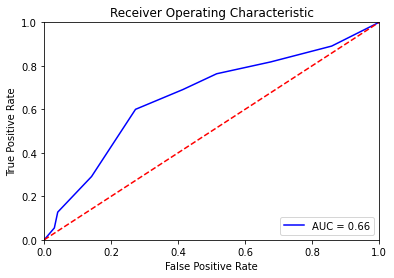

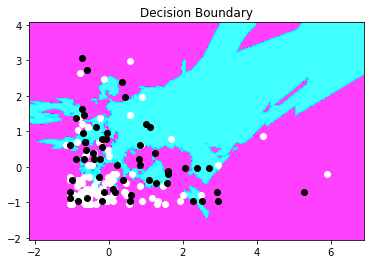

In [406]:
classification_plots(model,X_test,y_test)

### Logisitic Regression Model

Function to run Logistic Regression model with no hyperparameters

Inputs: Features, target

Returns the average score over the number of iterations, the model, the X test data and the y test data.



#### run_log_regress (5 pts)

Complete the code in run_knn.

In [407]:
def run_log_regress(X,y,iter=5):
    scores = 0
    # Loop to instantiate and run model iter times
    # Yoru Code Here
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 1234)
    
    for i in range(iter):
        model = LogisticRegression(random_state=1234)
        model.fit(X_train, y_train)
        scores += model.score(X_test, y_test)
    scores /= iter
    
    print(f'Average score: {scores}')
    return model,X_test,y_test

#### Run Logistic Regresssion model with all the features (2pts)

No hyperparameters  
Number of iterations: 5

In [408]:
# Make feature and target arrays
# Your Code Here
X = df.iloc[:,:8].values
y = df[['Class']].T.squeeze().map({'yes': 1, 'no': -1}).values
iter = 5

# Call run_log_regress
# Your Code Here
model, X_test, y_test = run_log_regress(X, y, iter)

Average score: 0.8116883116883116


#### Run Logistic Regresssion model with two features (3 pts)

Features: Two features you think will give the best prediction 
Number of iterations: 5

In [427]:
# Make feature and target arrays
# Your Code Here
X = df.iloc[:,[1, 4]].values
y = df[['Class']].T.squeeze().map({'yes': 1, 'no': -1}).values
iter = 5


# Call run_log_regress
# Your Code Here
model, X_test, y_test = run_log_regress(X, y, iter)

Average score: 0.8116883116883116


### Support Vector Machine model

Function to run SVM model with 2 hyperparameters, C and the kernel

Inputs: Features, target, list of hyperparameters

Returns the average score over the number of iterations, the model, the X test data and the y test data.

#### run_svm (10 pts)

Complete the code in run_svm.

In [410]:
def run_svm(X,y,hyperparams,iter=5):
    avg_scores = np.zeros(len(hyperparams))
    # Loop to instantiate and run model iter times with different hyperparameters
    # Your Code Here
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=1234)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    for i in range(len(hyperparams)):
        model = SVC(C= hyperparams[i][0], kernel=hyperparams[i][1], random_state=1234, probability=True)
        for j in range(iter):
            model.fit(X_train, y_train)
            avg_scores[i] += model.score(X_test, y_test)
        avg_scores[i] = avg_scores[i] / iter
   
    return avg_scores,model,X_test,y_test

#### Run Logistic Regresssion model with all features (2 pts)

Features: All  
Hyperparameters: List of lists: ((C,kernel),(C,kernel),...)  
(1.0,'linear'),(1.0,'rbf'),(1.0,'poly')  
Number of iterations: 5

In [411]:
# Make feature and target arrays
# Your Code Here
X = df.iloc[:,:8].values
y = df[['Class']].T.squeeze().map({'yes': 1, 'no': -1}).values
iter = 5
hyperparams = [(1.0,'linear'),(1.0,'rbf'),(1.0,'poly')]

# Call run_svm
# Your Code Here
avg_scores, model, X_test, y_test = run_svm(X, y, hyperparams, iter)

In [412]:
 print(f'Average Scores: {avg_scores}')

Average Scores: [0.81168831 0.77272727 0.74025974]


#### Run SVM model with two features (3pts)

Features: Two features you think will give the best prediction   
Hyperparameters: List of lists: ((C,kernel),(C,kernel),...)  
(1.0,'linear'),(1.0,'rbf'),(1.0,'poly')  
Number of iterations: 5

In [425]:
# Make feature and target arrays
# Your Code Here
X = df.iloc[:,[1, 7]].values
y = df[['Class']].T.squeeze().map({'yes': 1, 'no': -1}).values
iter = 5
hyperparams = [(1.0,'linear'),(1.0,'rbf'),(1.0,'poly')]

# Call run_svm
# Your Code Here
avg_scores, model, X_test, y_test = run_svm(X, y, hyperparams, iter)

Average Scores: [0.7987013  0.81818182 0.73376623]


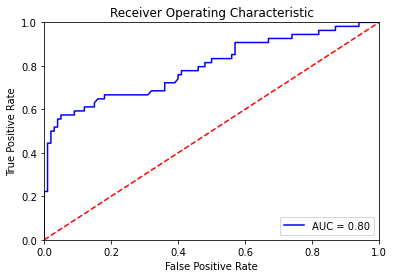

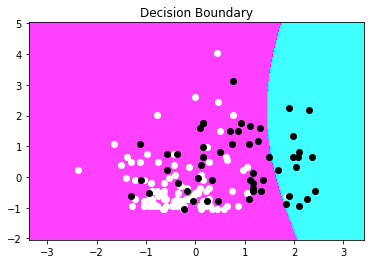

In [426]:
print(f'Average Scores: {avg_scores}')
classification_plots(model,X_test,y_test)

### Part 2:  PyTorch SVM model for the dataset with all the features

1. You only have to convert your training data to PyTorch tensors
and define your model class with 2 linear layers, named linear1 and linear2.  (2pts)
2. Apply a ReLU function to linear1 and send the output to linear2.  
Linear2 should have 8 nodes. (4pts) 
3. Use the Adam optimizer with a learning rate of 0.01 (2pts)
4. Predict training and test data (2pts)

In [415]:
import torch
import torch.nn as nn
import torch.optim as optim
torch.__version__

'1.4.0'

In [416]:
# Copy you code from run_model that splits the data and scales it for all features
X = df.iloc[:,:8].values
y = df[['Class']].T.squeeze().map({'yes': 1, 'no': -1}).values
X_train,X_test,y_train,y_test = train_test_split(X, y,  test_size = 0.2, stratify=y,
                                                 random_state = 1234)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data into torch tensors
# Your Code Here
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

X_train_t = torch.from_numpy(X_train.astype(np.float32))
X_test_t = torch.from_numpy(X_test.astype(np.float32))
y_train_t = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test_t = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

X_train_t.shape,X_test_t.shape,y_train_t.shape,y_test_t.shape

(torch.Size([614, 8]),
 torch.Size([154, 8]),
 torch.Size([614, 1]),
 torch.Size([154, 1]))

#### Class definition

Define a network with all the features as inputs.

In [444]:
class SVM(nn.Module):
    def __init__(self,num_in,num_out):
        super(SVM,self).__init__()
        # Define layers
        # Your Code Here
        self.linear1 = nn.Linear(num_in, num_in)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_in, num_out)
        
    def forward(self,x):
        # Your Code Here
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        
        return x
    
model = SVM(8,1)    


#### Optimizer and Loss function

In [445]:
# Instantiate Optimizer
# Your Code Here
optimizer = optim.Adam(model.parameters(), lr=0.01)

def svm_loss(w,y,lin_out,c):
    constraint = torch.mean(torch.clamp(1 - y * lin_out, min=0)) #>= 0
    return c*torch.dot(w.t(),w)/2.0 + constraint

#### Train Model

In [446]:
def train(X, Y, model, batchsize,epochs,c):
    N = len(Y)
    model.train()
    for epoch in range(epochs):
        perm = torch.randperm(N)
        sum_loss = 0

        for i in range(0, N, batchsize):
            x = X[perm[i : i + batchsize]]
            y = Y[perm[i : i + batchsize]]

            optimizer.zero_grad()
            output = model(x).squeeze()
            weight = model.linear2.weight.squeeze()
            loss = svm_loss(weight,y,output,c)
            loss.backward()
            optimizer.step()

            sum_loss += float(loss)
    print(sum_loss/N)

#### Predict training and test data and calculate accuracy

In [447]:
def torch_accuracy():
    with torch.no_grad():
      ## Predict Training data
      p_train = model(X_train_t) # Your Code Here
      p_train = np.round(p_train.cpu().numpy())
      train_acc = np.mean(y_train_t.cpu().numpy() == p_train) # Get accuracy
      
      ## Predict test data
      p_test = model(X_test_t) # Your Code Here
      p_test = np.round(p_test.cpu().numpy())
      test_acc = np.mean(y_test_t.cpu().numpy() == p_test) # Get accuracy
    print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

#### Run

In [448]:
c = 100.0
batchsize = 50
num_epochs = 500
for i in range(5):
    train(X_train_t, y_train_t, model, batchsize, num_epochs, c)
    torch_accuracy()

0.0144719161117504
Train acc: 0.6515, Test acc: 0.6494
0.01447264257976209
Train acc: 0.6515, Test acc: 0.6494
0.014457711713321823
Train acc: 0.6515, Test acc: 0.6494
0.015142101272697946
Train acc: 0.6515, Test acc: 0.6494
0.015462525552957764
Train acc: 0.6515, Test acc: 0.6494


### Part 3: Linear Algebra

For the marix A below, calculate ATA the square matrix of A times A transpose.
Show that the singular values of the Singular Value Decomposition of A are equal to the square root of the eigenvalues of ATA. (5pts)

In [328]:
A = np.array([[1,2,3,4],[5,6,7,8]])

# Your Code Here
import math 
ATA = np.dot(A.transpose(), A)
print("ATA\n{}".format(ATA))

ATAvalue, ATAvector = la.eig(ATA)
SVD = la.svd(A)

print("Sqrt of eigenvalues of ATA: {}".format([math.sqrt(ATAvalue[0]), math.sqrt(ATAvalue[1])]))
print("Sigular values of SVD of A: {}".format(SVD[1]))

ATA
[[26 32 38 44]
 [32 40 48 56]
 [38 48 58 68]
 [44 56 68 80]]
Sqrt of eigenvalues of ATA: [14.22740741263374, 1.2573298353791125]
Sigular values of SVD of A: [14.22740741  1.25732984]


<ipython-input-328-7e3cc5fc0e38>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  print("Sqrt of eigenvalues of ATA: {}".format([math.sqrt(ATAvalue[0]), math.sqrt(ATAvalue[1])]))



Given x and z below. Define a function Poly_k that implements the polynomial kernel with r = 0 and d = 2. Also define a function Phi that computes the dot product of the $\phi$ transformation. Show that given the inputs x and z they compute the same value.
$\Phi(\vec{x}) = (x_1^2,\sqrt{2}x_1x_2,x_2^2) $ (5pts)

In [450]:
x = np.array([3,4])
z = np.array([2,5])

In [453]:
# Your Code Here

def Poly_k(x, z , d=2):
    return np.power(np.dot(x.transpose(), z),d)

def Phi(x, z):
    [x1, x2] = x
    [z1, z2] = z
    return (x1**2) * (z1**2) + 2*x1*z1*x2*z2 + (x2**2 * z2**2)

print("Poly_k: {}".format(Poly_k(x,z)))
print("Phi: {}".format(Phi(x, z)))

Poly_k: 676
Phi: 676
